In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('../../data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/fashion\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../data/fashion\t10k-images-idx3-ubyte.gz
Extracting ../../data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
"Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape)

'Training set (images) shape: (55000, 784)'

In [4]:
"Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape)

'Training set (labels) shape: (55000, 10)'

In [5]:
"Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape)

'Test set (images) shape: (10000, 784)'

In [6]:
"Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape)

'Test set (labels) shape: (10000, 10)'

In [7]:
seed = 777
tf.set_random_seed(seed)

In [8]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y = 3 (Dress)
y = 7 (Sneaker)


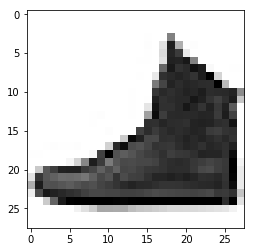

In [10]:
# Sample 1

# Get 28x28 image
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[47] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

# Sample 2

# Get 28x28 image
sample_2 = fashion_mnist.train.images[23].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(fashion_mnist.train.labels[23] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')

In [11]:
# PlaceHolder 설정

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.int32)

ph_keep  = tf.placeholder(tf.float32)

In [12]:
# 모델 구성

# 1번째 layer

# [3,3 → Filter의미, ,1 → 흑백 channel 한개,  32] → 32개의 Filter
w_conv_1 = tf.Variable(tf.truncated_normal([3, 3, 1, 32], stddev=0.1)) # channel의 1 → 32로 증가한다(두꺼워진다)
b_conv_1 = tf.Variable(tf.constant(0.1, shape=[32]))

l_conv_1 = tf.nn.conv2d(X, w_conv_1, strides=[1, 1, 1, 1], padding='SAME')
l_relu_1 = tf.nn.relu(l_conv_1 + b_conv_1)
l_pool_1 = tf.nn.max_pool(l_relu_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# 2번째 layer

w_conv_2 = tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.1))
b_conv_2 = tf.Variable(tf.constant(0.1, shape=[64]))

l_conv_2 = tf.nn.conv2d(l_pool_1, w_conv_2, strides=[1, 1, 1, 1], padding='SAME')
l_relu_2 = tf.nn.relu(l_conv_2 + b_conv_2)
l_pool_2 = tf.nn.max_pool(l_relu_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [14]:
# 3번째 flat Layer

l_flat   = tf.reshape(l_pool_2, [-1, 7 * 7 * 64])

w_full_3 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 256], stddev=0.1))
b_full_3 = tf.Variable(tf.constant(0.1, shape=[256]))

l_full_3 = tf.matmul(l_flat, w_full_3) + b_full_3
l_relu_3 = tf.nn.relu(l_full_3)
l_drop_3 = tf.nn.dropout(l_relu_3, rate=0.7)

In [15]:
# last

w_full_4 = tf.Variable(tf.truncated_normal([256, 10], stddev=0.1))
b_full_4 = tf.Variable(tf.constant(0.1, shape=[10]))

# (?, 10)
logit  = tf.matmul(l_drop_3, w_full_4) + b_full_4
H      = tf.nn.softmax(logit)

In [16]:
# Hyper Parameter Setting

learn_rate = 0.001
epochs     = 30
batch_size = 100
batch_iter = fashion_mnist.train.num_examples // batch_size # 550

In [17]:
# 2. Cost function 최소화

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=tf.stop_gradient(Y)))

optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate).minimize(cost)

In [18]:
# Train

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epcochs를 1번 돌고 념
for i in range(epochs):
    
    total_cost = 0 #비용 전체의 합
    
    for j in range(batch_iter):
        batch_xs, batch_ys = fashion_mnist.train.next_batch(batch_size)

        batch_xs = batch_xs.reshape([-1, 28, 28, 1])

        feed_data = {X: batch_xs, Y: batch_ys, ph_keep: 0.5}
        _cost, _optimizer = sess.run([cost, optimizer], feed_dict=feed_data)
        
        total_cost += _cost        

    # avg_cost : 평균비용
    avg_cost = total_cost / batch_iter        
#     print('{:.9f}'.format(avg_cost))
    print('Epoch {0} :   {1:.9f}'.format(i, avg_cost))    

Epoch 0 :   0.752968331
Epoch 1 :   0.473504328
Epoch 2 :   0.407256938
Epoch 3 :   0.363817059
Epoch 4 :   0.336101405
Epoch 5 :   0.312511345
Epoch 6 :   0.291114970
Epoch 7 :   0.277305912
Epoch 8 :   0.261455452
Epoch 9 :   0.248495345
Epoch 10 :   0.236782945
Epoch 11 :   0.226472568
Epoch 12 :   0.214668821
Epoch 13 :   0.206678695
Epoch 14 :   0.200193032
Epoch 15 :   0.189207703
Epoch 16 :   0.182487363
Epoch 17 :   0.174237406
Epoch 18 :   0.168794013
Epoch 19 :   0.164780989
Epoch 20 :   0.156279500
Epoch 21 :   0.152919787
Epoch 22 :   0.142511891
Epoch 23 :   0.139932506
Epoch 24 :   0.131243032
Epoch 25 :   0.129838388
Epoch 26 :   0.126334355
Epoch 27 :   0.121839729
Epoch 28 :   0.118605768
Epoch 29 :   0.115274114


In [19]:
import numpy as np

# 모델 테스트와 정확도 체크하기
xx = fashion_mnist.test.images.reshape([-1, 28, 28, 1])

preds = sess.run(H, {X: xx, ph_keep: 1.0})

preds_arg = np.argmax(preds, axis=1)  # 1: 수평, 0: 수직
test_arg  = np.argmax(fashion_mnist.test.labels, axis=1)

print('acc: ', np.mean(preds_arg == test_arg))
print(preds_arg)

acc:  0.911
[9 2 1 ... 8 1 5]



라벨(Label) : [1]

예측(Prediction) : [1]
y = 1 (Trouser)


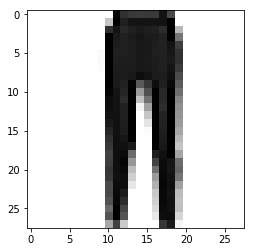

In [20]:
import random

# 임의의 그림 1개를 구하고, 예측하기
randitem  = random.randint(0, fashion_mnist.test.num_examples -1)
print('\n라벨(Label) :', end=' ')
print(sess.run(tf.argmax(fashion_mnist.test.labels[randitem:randitem+1], axis=1)))

print('\n예측(Prediction) :', end=' ')
feed_data={X:fashion_mnist.test.images[randitem:randitem+1].reshape([-1, 28, 28, 1]), ph_keep:1.0}
print(sess.run(tf.argmax(H, axis=1), feed_dict = feed_data))

# plt.imshow(fashion_mnist.test.images[randitem:randitem+1].reshape(img_row, img_column), cmap='Greys', interpolation='nearest')
# plt.show()

# Get 28x28 image
sample_1 = fashion_mnist.test.images[randitem].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.test.labels[randitem] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

In [21]:
sess.close()